In [2]:
# Gerekli olan kütüphaneleri import ediyorum
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor


import joblib

DATA EXPLORATION AND VISUALIZATION

In [3]:
# Bu bölümde veriyi inceliyorum sadece
data_file_name = "output_file.csv"

In [4]:
# Veriyi data frame nesnesi olarak içeri aktarıyoruz
base_df = pd.read_csv(data_file_name, encoding='utf-8')
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46234 entries, 0 to 46233
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Yıl                46234 non-null  int64  
 1   Model              46234 non-null  int64  
 2   Renk               46234 non-null  int64  
 3   Boya-değişen       46234 non-null  float64
 4   Çekiş              46234 non-null  float64
 5   Arka Tampon        46234 non-null  float64
 6   Sağ Ön Çamurluk    46234 non-null  float64
 7   Sol Ön Çamurluk    46234 non-null  float64
 8   Kilometre          46234 non-null  int64  
 9   Fiyat              46234 non-null  int64  
 10  Marka              46234 non-null  int64  
 11  Yakıt Tipi         46234 non-null  float64
 12  Vites Tipi         46234 non-null  float64
 13  Kasa Tipi          46234 non-null  float64
 14  Ön Tampon          46234 non-null  float64
 15  Arka Kaput         46234 non-null  float64
 16  Sol Arka Kapı      462

In [5]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [6]:
check_df(dataframe = base_df, head = 5)

##################### Shape #####################
(46234, 24)
##################### Types #####################
Yıl                    int64
Model                  int64
Renk                   int64
Boya-değişen         float64
Çekiş                float64
Arka Tampon          float64
Sağ Ön Çamurluk      float64
Sol Ön Çamurluk      float64
Kilometre              int64
Fiyat                  int64
Marka                  int64
Yakıt Tipi           float64
Vites Tipi           float64
Kasa Tipi            float64
Ön Tampon            float64
Arka Kaput           float64
Sol Arka Kapı        float64
Sol Ön Kapı          float64
Sağ Ön Kapı          float64
_id                   object
Sağ Arka Kapı        float64
Seri                 float64
Sağ Arka Çamurluk    float64
Sol Arka Çamurluk    float64
dtype: object
##################### Head #####################
    Yıl  Model  Renk  Boya-değişen  Çekiş  Arka Tampon  Sağ Ön Çamurluk  \
0  2023  30248   403         683.0  508.0          4.0

In [7]:
# işimize yarayan verileri alıyoruz.
useful_df = base_df.drop(['_id'], axis=1)

In [8]:
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46234 entries, 0 to 46233
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Yıl                46234 non-null  int64  
 1   Model              46234 non-null  int64  
 2   Renk               46234 non-null  int64  
 3   Boya-değişen       46234 non-null  float64
 4   Çekiş              46234 non-null  float64
 5   Arka Tampon        46234 non-null  float64
 6   Sağ Ön Çamurluk    46234 non-null  float64
 7   Sol Ön Çamurluk    46234 non-null  float64
 8   Kilometre          46234 non-null  int64  
 9   Fiyat              46234 non-null  int64  
 10  Marka              46234 non-null  int64  
 11  Yakıt Tipi         46234 non-null  float64
 12  Vites Tipi         46234 non-null  float64
 13  Kasa Tipi          46234 non-null  float64
 14  Ön Tampon          46234 non-null  float64
 15  Arka Kaput         46234 non-null  float64
 16  Sol Arka Kapı      462

In [9]:
# unique değerlerin sayısını hesaplıyoruz.
find_unigue = ["Marka","Seri","Model","Yakıt Tipi","Kasa Tipi","Vites Tipi"]
number_of_unique = useful_df[find_unigue].nunique()
print(number_of_unique)

Marka           71
Seri           694
Model         3864
Yakıt Tipi       5
Kasa Tipi       20
Vites Tipi       3
dtype: int64


In [10]:
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46234 entries, 0 to 46233
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Yıl                46234 non-null  int64  
 1   Model              46234 non-null  int64  
 2   Renk               46234 non-null  int64  
 3   Boya-değişen       46234 non-null  float64
 4   Çekiş              46234 non-null  float64
 5   Arka Tampon        46234 non-null  float64
 6   Sağ Ön Çamurluk    46234 non-null  float64
 7   Sol Ön Çamurluk    46234 non-null  float64
 8   Kilometre          46234 non-null  int64  
 9   Fiyat              46234 non-null  int64  
 10  Marka              46234 non-null  int64  
 11  Yakıt Tipi         46234 non-null  float64
 12  Vites Tipi         46234 non-null  float64
 13  Kasa Tipi          46234 non-null  float64
 14  Ön Tampon          46234 non-null  float64
 15  Arka Kaput         46234 non-null  float64
 16  Sol Arka Kapı      462

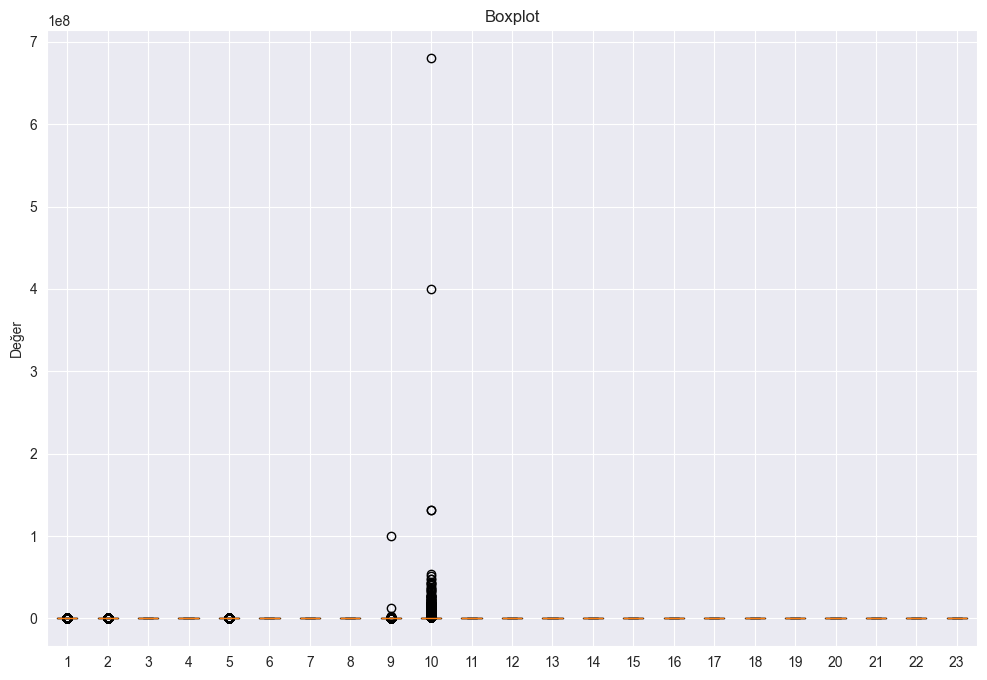

In [11]:
# Verideki bazı sütunlar milyon değerine kadar çıkabiliyor. Bu yüzden outlier analizi yapılmalı ve değerler normalize edilmeli.

plt.figure(figsize=(12, 8))
plt.boxplot(useful_df)
plt.title('Boxplot')
plt.ylabel('Değer')
plt.show()

# 7. sütunda yani fiyatta outlier özellikler var. IQR Analizi ile temizleyebiliriz

In [12]:
# Çeyreklerin hesaplanması
Q1 = useful_df["Fiyat"].quantile(0.25)
Q3 = useful_df["Fiyat"].quantile(0.75)

# IQR'nin hesaplanması
IQR = Q3 - Q1

# Aykırı değerlerin tanımlanması
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerlerin belirlenmesi
outliers = useful_df["Fiyat"][(useful_df["Fiyat"] < lower_bound) | (useful_df["Fiyat"] > upper_bound)]

print("Aykırı Değerler:")
print(outliers)

ready_to_train = useful_df.drop(outliers.index)
ready_to_train.reset_index(drop=True, inplace=True)


Aykırı Değerler:
33       1865900
41       1670000
57       2350000
83       1650000
88       1485750
          ...   
46078    2450000
46081    1520000
46082    1636000
46171    1679000
46200    1785000
Name: Fiyat, Length: 2632, dtype: int64


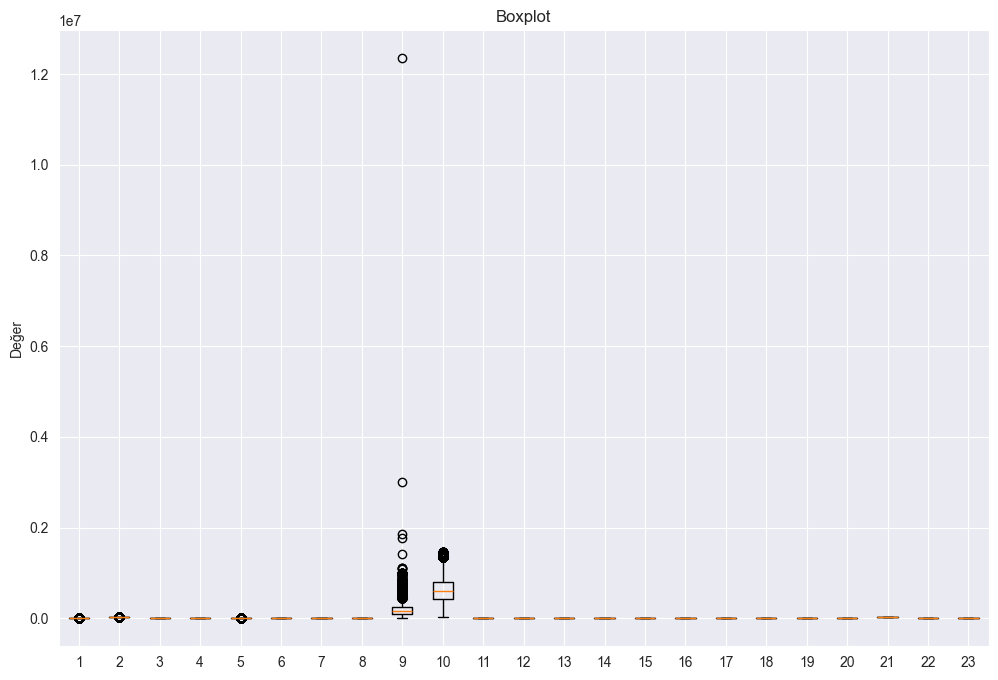

In [13]:
plt.figure(figsize=(12, 8))
plt.boxplot(ready_to_train)
plt.title('Boxplot')
plt.ylabel('Değer')
plt.show()

Data Train Test Split

In [14]:
X = ready_to_train.drop("Fiyat", axis = 1)
y = ready_to_train["Fiyat"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 12
                                                    )

scaler_X_test = MinMaxScaler() # bu minmaxscaler işlemi sadece yapay sinir ağı eğitiminde kullanmak için var
scaler_X_train = MinMaxScaler() # yapay sinir ağına vermek için verilerin normalize edilmiş versiyonunu saklıyorum

scaled_X_test = pd.DataFrame(scaler_X_test.fit_transform(X_test), columns=X.columns)
scaled_X_train = pd.DataFrame(scaler_X_train.fit_transform(X_train), columns=X.columns)

Modelling Part

In [15]:
# LinerRegression modeli
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Eğitim ve test hatasını hesaplayalım
train_predictions_lr = model_lr.predict(X_train)
test_predictions_lr = model_lr.predict(X_test)
train_rmse_lr = mean_squared_error(y_train, train_predictions_lr, squared=False)
test_rmse_lr = mean_squared_error(y_test, test_predictions_lr, squared=False)

print("Eğitim RMSE:", train_rmse_lr)
print("Test RMSE:", test_rmse_lr)

Eğitim RMSE: 159838.86014659947
Test RMSE: 157511.06699633214


/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
# XGBoost regresyon modelini oluşturalım ve eğitelim
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
# Eğitim ve test hatasını hesaplayalım
train_predictions_xgb = model_xgb.predict(X_train)
test_predictions_xgb = model_xgb.predict(X_test)
train_rmse_xgb = mean_squared_error(y_train, train_predictions_xgb, squared=False)
test_rmse_xgb = mean_squared_error(y_test, test_predictions_xgb, squared=False)

print("Eğitim RMSE:", train_rmse_xgb)
print("Test RMSE:", test_rmse_xgb)

Eğitim RMSE: 58673.79487324612
Test RMSE: 74912.82035960842


/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


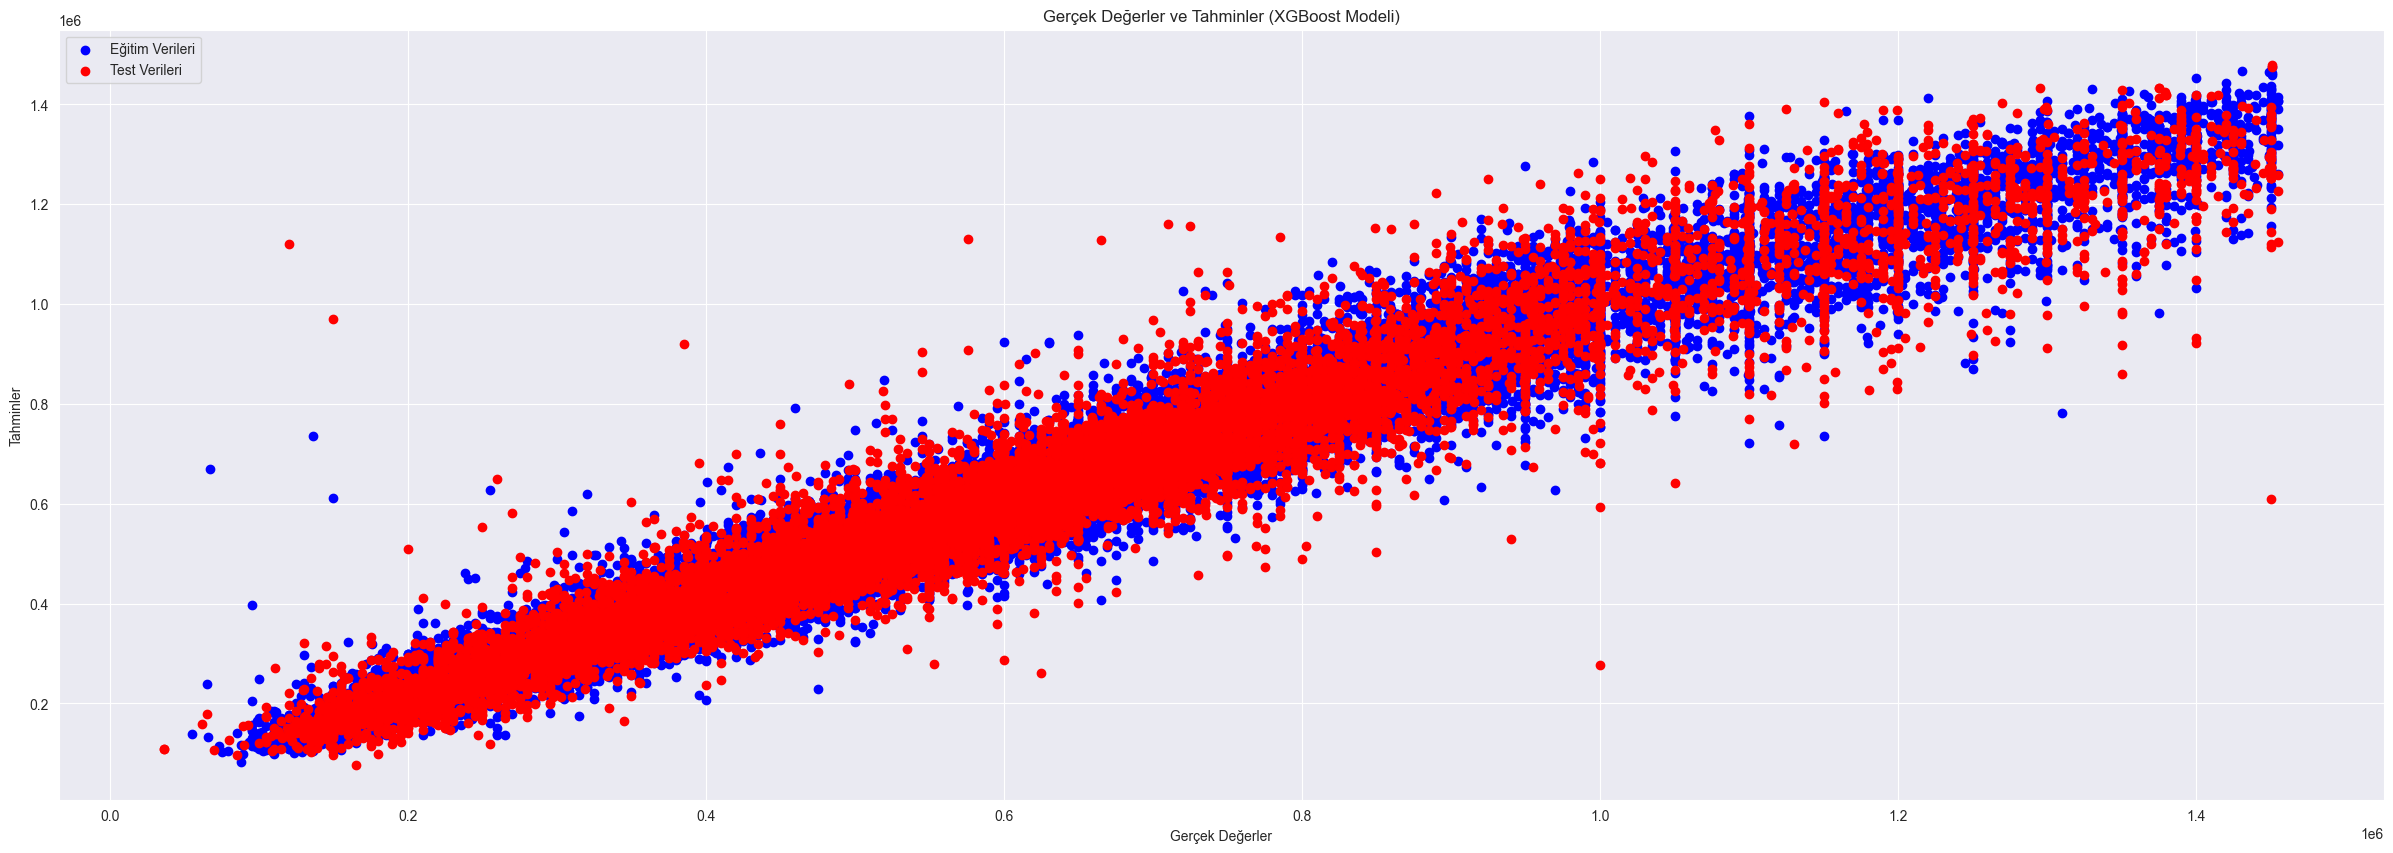

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))

plt.scatter(y_train, train_predictions_xgb, color='blue', label='Eğitim Verileri')
plt.scatter(y_test, test_predictions_xgb, color='red', label='Test Verileri')

plt.title('Gerçek Değerler ve Tahminler (XGBoost Modeli)')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')
plt.legend()

plt.show()


In [20]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
# Eğitim ve test hatasını hesaplayalım
train_predictions_rf = model_rf.predict(X_train)
test_predictions_rf = model_rf.predict(X_test)
train_rmse_rf = mean_squared_error(y_train, train_predictions_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, test_predictions_rf, squared=False)

print("Eğitim RMSE:", train_rmse_rf)
print("Test RMSE:", test_rmse_rf)

# # Eğitim Verisinde güzel sonuç veriyor ama test verisinde çuvallamış. Overfitting olmuş. Bu model geliştirilebilir.

Eğitim RMSE: 29110.721673853957
Test RMSE: 77312.15680646997


/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


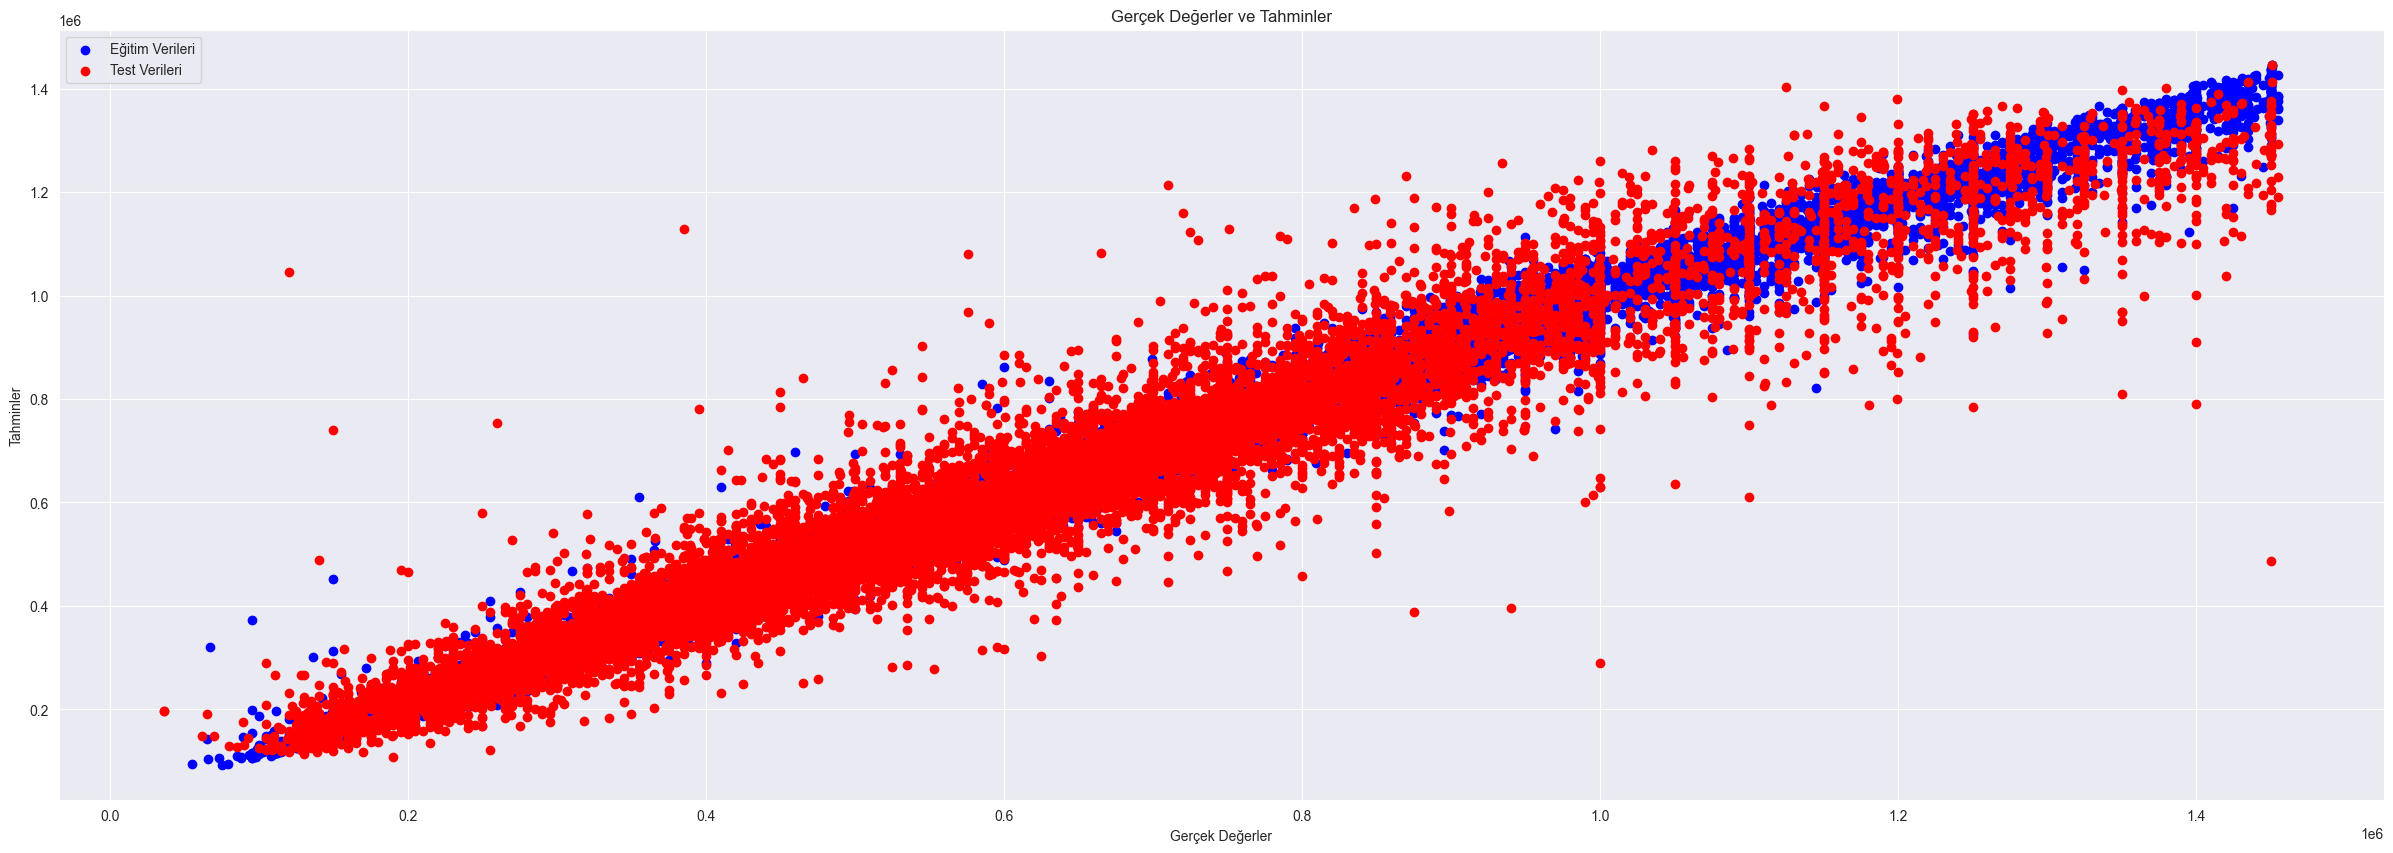

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))

plt.scatter(y_train, train_predictions_rf, color='blue', label='Eğitim Verileri')
plt.scatter(y_test, test_predictions_rf, color='red', label='Test Verileri')

plt.title('Gerçek Değerler ve Tahminler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')
plt.legend()

plt.show()